In [7]:
import joblib
import numpy as np
from tensorflow.keras.models import load_model

# Load pre-trained models
ddos_detection_model = load_model('I:/WAF with mechine learning/DDos/CNN model for DDOS.h5')
# sql_xss_detection_model = load_model('sql_xss_detection_model.h5')

# Load preprocessing objects if needed
# For example, if you used StandardScaler during training
ss_ddos = joblib.load('I:/WAF with mechine learning/DDos/dods_standard_scaler.pkl')
# ss_sql_xss = joblib.load('standard_scaler_sql_xss.pkl')

# Load your new dataset
# Replace 'new_data.csv' with the path to your new dataset file
new_data = np.loadtxt('I:/WAF with mechine learning/Dataset/DDos 2019 cic/01-12/DrDoS_DNSfinal.csv', delimiter=',', skiprows=1)

# Preprocess the new dataset
# Apply the same preprocessing steps used during training
# For example, normalization using the StandardScaler
new_data_ddos_std = ss_ddos.transform(new_data[:, :20])
# new_data_sql_xss_std = ss_sql_xss.transform(new_data[:, 7:])

# Perform predictions for DDoS detection
ddos_predictions = (ddos_detection_model.predict(new_data_ddos_std) > 0.5).astype("int64")

# Perform predictions for SQL injection and XSS detection
# sql_xss_predictions = (sql_xss_detection_model.predict(new_data_sql_xss_std) > 0.5).astype("int64")

print("DDoS predictions:", ddos_predictions)
# print("SQL injection and XSS predictions:", sql_xss_predictions)


i:\WAF with mechine learning\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


153501/153501 [==============================] - 360s 2ms/step
DDoS predictions: [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


In [8]:
ddos_percentage = np.mean(ddos_predictions) * 100
print("Percentage of DDoS predictions:", ddos_percentage, "%")

Percentage of DDoS predictions: 99.93192208743493 %


In [5]:
import pandas as pd
true_labels = pd.read_csv('I:/WAF with mechine learning/Dataset/DDos 2019 cic/01-12/DrDoS_DNSfinal.csv', delimiter=',',)

print(true_labels.columns)


Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Mean',
  

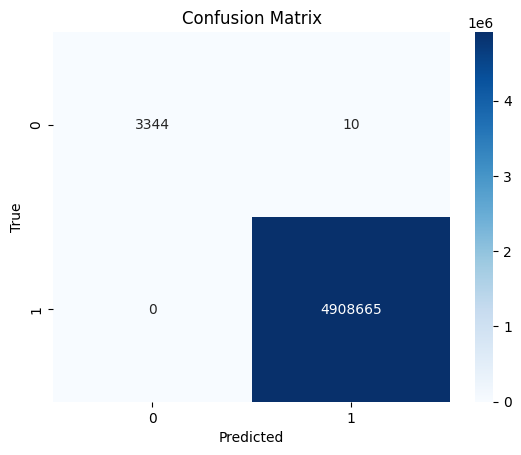

In [6]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming the label column is named 'Label', change it if it has a different name
y_true_ddos = true_labels['Label'].values

conf_matrix = confusion_matrix(y_true_ddos, ddos_predictions)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [1]:

import joblib

class DDoSDetection:
    def __init__(self, model, scaler):
        self.model = model
        self.scaler = scaler

    def predict(self, data):
        scaled_data = self.scaler.transform(data)
        predictions = (self.model.predict(scaled_data) > 0.5).astype("int64")
        return predictions

class SQLXSSDetection:
    def __init__(self, model):
        self.model = model

    def predict(self, data):
        predictions = (self.model.predict(data) > 0.5).astype("int64")
        return predictions

def main():
    # Load DDoS detection model and scaler
    ddos_detection_model = load_model('I:/WAF with mechine learning/DDos/CNN model for DDOS.h5')
    ss_ddos = joblib.load('I:/WAF with mechine learning/DDos/dods_standard_scaler.pkl')
    
    # Load SQL injection and XSS detection model
    sql_xss_detection_model = load_model('I:/WAF with mechine learning/SQL and XSS/CNN_model_for_XSS_and_SQL_injection.h5')

    # Initialize DDoS detection layer
    ddos_detector = DDoSDetection(ddos_detection_model, ss_ddos)

    # Initialize SQL injection and XSS detection layer
    sql_xss_detector = SQLXSSDetection(sql_xss_detection_model)

    # Load your new dataset
    new_data = np.loadtxt('I:/WAF with mechine learning/Dataset/combined.csv', delimiter=',', skiprows=1)

    # Preprocess the new dataset
    new_data_ddos_std = ddos_detector.scaler.transform(new_data[:, :20])

    # First Layer: DDoS Detection
    ddos_predictions = ddos_detector.predict(new_data_ddos_std)

    # Filter out DDoS predicted data
    new_data_filtered = new_data[np.where(ddos_predictions == 0)]

    # Check if new_data_filtered is 1-dimensional or empty
    if new_data_filtered.ndim == 1 or len(new_data_filtered) == 0:
        print("No data available for SQL injection and XSS detection.")
        return

    # Second Layer: SQL injection and XSS Detection
    sql_xss_predictions = sql_xss_detector.predict(new_data_filtered[:, 7:])  # Assuming column indices for SQL injection and XSS features

    print("DDoS predictions:", ddos_predictions)
    print("SQL injection and XSS predictions:", sql_xss_predictions)

if __name__ == "__main__":
    main()


i:\WAF with mechine learning\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
i:\WAF with mechine learning\venv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


155409/155409 [==============================] - 291s 2ms/step
No data available for SQL injection and XSS detection.


In [1]:
import os

# Replace 'proxy_address' and 'proxy_port' with the actual address and port of your proxy server
proxy_address = '192.168.1.5'
proxy_port = '8000'

# Set environment variables for HTTP and HTTPS proxies
http_proxy=os.environ['http_proxy'] = f"http://{proxy_address}:{proxy_port}"
https_proxy=os.environ['https_proxy'] = f"http://{proxy_address}:{proxy_port}"


In [2]:
print(http_proxy)
print(http_proxy)

http://192.168.1.5:8000
http://192.168.1.5:8000


In [ ]:

import numpy as np
import pickle
from tensorflow.keras.models import load_model

# Load DDoS detection model
ddos_detection_model_path = 'I:/WAF with mechine learning/DDos/CNN model for DDOS.h5'
ddos_model = load_model(ddos_detection_model_path)

# Load standard scaler for DDoS detection
ss_ddos_path = 'I:/WAF with mechine learning/DDos/dods_standard_scaler.pkl'
with open(ss_ddos_path, 'rb') as file:
    ss_ddos = pickle.load(file)

# Load SQL injection and XSS detection model
sql_xss_detection_model_path = 'I:/WAF with mechine learning/SQL and XSS/CNN_model_for_XSS_and_SQL_injection.h5'
sql_xss_model = load_model(sql_xss_detection_model_path)

# Function to preprocess data using the loaded standard scaler
def preprocess_data(data, scaler):
    return scaler.transform(data)

# Function for first layer (DDoS) detection
def first_layer_detection(features):
    predictions = ddos_model.predict(features)
    return predictions

# Function for second layer (XSS and SQL injection) detection
def second_layer_detection(features):
    predictions = sql_xss_model.predict(features)
    return predictions

# Main function to handle incoming HTTP traffic from the proxy
def handle_http_traffic(proxy_host, proxy_port):
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as proxy_socket:
        proxy_socket.connect((proxy_host, proxy_port))
        
        while True:
            # Receive live traffic data from the proxy
            data = proxy_socket.recv(1024)  # Adjust buffer size as needed
            
            # Preprocess traffic data using standard scaler for DDoS detection
            preprocessed_data = preprocess_data(data, ss_ddos)
            
            # First layer detection (DDoS)
            ddos_predictions = first_layer_detection(preprocessed_data)
            
            # Second layer detection (XSS and SQL injection)
            filtered_data = [data[i] for i in range(len(data)) if ddos_predictions[i] == 0]
            xss_sql_predictions = second_layer_detection(filtered_data)
            
            # Route only correctly classified traffic to the web server
            for i in range(len(filtered_data)):
                if xss_sql_predictions[i] == 0:
                    route_to_web_server(filtered_data[i])

# Function to route traffic to the web server
def route_to_web_server(packet):
    # Code to forward packet to the web server
    pass

# Example usage
proxy_host = 'loaclhost'
proxy_port = 3000
handle_http_traffic(proxy_host, proxy_port)


In [ ]:
from sklearn.metrics import accuracy_score

# Assuming ddos_predictions is the array of DDoS predictions
# Assuming true_labels is the array of true labels for the dataset
ddos_accuracy = accuracy_score(true_labels, ddos_predictions)
print("Accuracy for DDoS predictions:", ddos_accuracy)


In [ ]:


# Global counters to track the number of requests
total_requests = 0
passed_first_layer = 0
passed_second_layer = 0

def capture_packets(proxy_host, proxy_port):
    global total_requests
    global passed_first_layer
    global passed_second_layer
    
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as proxy_socket:
        proxy_socket.bind((proxy_host, proxy_port))
        proxy_socket.listen()
        print(f"Proxy server listening on {proxy_host}:{proxy_port}")
        
        while True:
            client_socket, client_address = proxy_socket.accept()
            print(f"Connection from {client_address}")
            packet_data = b""
            while True:
                chunk = client_socket.recv(1024)
                if not chunk:
                    break
                packet_data += chunk
            total_requests += 1
            # Process packet data to extract features
            features = parse_packet_data(packet_data)
            # Perform further analysis or send features to the Packet Analyzer Module
            if analyze_packet(features):
                passed_first_layer += 1
                if analyze_second_layer(features):
                    passed_second_layer += 1
                    route_to_web_server(packet_data)

def parse_packet_data(packet_data):
    # Convert packet data to a string
    packet_str = packet_data.decode('utf-8', errors='ignore')
    
    # Split the packet data by '\r\n' to separate headers
    headers = packet_str.split('\r\n')
    
    # Create a dictionary to store parsed features
    features = {}
    
    # Extract relevant features from HTTP headers
    for header in headers:
        if ':' in header:
            key, value = header.split(':', 1)
            features[key.strip()] = value.strip()
    
    return features

def analyze_packet(features):
    # Placeholder implementation for analyzing packet features in the first layer
    # Return True if the packet passes the first layer analysis, otherwise False
    # Example: return packet_analyzer.analyze(features)
    return True

def analyze_second_layer(features):
    # Placeholder implementation for analyzing packet features in the second layer
    # Return True if the packet passes the second layer analysis, otherwise False
    # Example: return packet_analyzer.analyze(features)
    return True

def route_to_web_server(packet_data):
    # Placeholder implementation for routing the packet to the web server
    # You can implement the logic to forward the packet to the web server
    pass

# Example usage
proxy_host = 'localhost'
proxy_port = 3000
capture_packets(proxy_host, proxy_port)

# Print the summary
print("Total requests:", total_requests)
print("Requests passed first layer:", passed_first_layer)
print("Requests passed second layer:", passed_second_layer)


Proxy server listening on localhost:3000
Connection from ('127.0.0.1', 7904)
Connection from ('127.0.0.1', 7905)
Connection from ('127.0.0.1', 7906)
Connection from ('127.0.0.1', 7907)
Connection from ('127.0.0.1', 7908)
Connection from ('127.0.0.1', 7909)
Connection from ('127.0.0.1', 7910)
Connection from ('127.0.0.1', 7949)
Connection from ('127.0.0.1', 8945)
Connection from ('127.0.0.1', 8949)
Connection from ('127.0.0.1', 8951)
Connection from ('127.0.0.1', 6998)


In [1]:
import socket

# Global counters to track the number of requests
total_requests = 0
passed_first_layer = 0
passed_second_layer = 0

def capture_packets(proxy_host, proxy_port):
    global total_requests
    global passed_first_layer
    global passed_second_layer
    
    with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as proxy_socket:
        proxy_socket.bind((proxy_host, proxy_port))
        proxy_socket.listen()
        print(f"Proxy server listening on {proxy_host}:{proxy_port}")
        
        while True:
            client_socket, client_address = proxy_socket.accept()
            print(f"Connection from {client_address}")
            packet_data = b""
            while True:
                chunk = client_socket.recv(1024)
                if not chunk:
                    break
                packet_data += chunk
            total_requests += 1
            # Process packet data to extract features
            features = parse_packet_data(packet_data)
            # Perform further analysis or send features to the Packet Analyzer Module
            if analyze_packet(features):
                passed_first_layer += 1
                if analyze_second_layer(features):
                    passed_second_layer += 1
                    route_to_web_server(packet_data)

def parse_packet_data(packet_data):
    # Convert packet data to a string
    packet_str = packet_data.decode('utf-8', errors='ignore')
    
    # Split the packet data by '\r\n' to separate headers
    headers = packet_str.split('\r\n')
    
    # Create a dictionary to store parsed features
    features = {}
    
    # Extract relevant features from HTTP headers
    for header in headers:
        if ':' in header:
            key, value = header.split(':', 1)
            features[key.strip()] = value.strip()
    
    return features

def analyze_packet(features):
    # Placeholder implementation for analyzing packet features in the first layer
    # Return True if the packet passes the first layer analysis, otherwise False
    # Example: return packet_analyzer.analyze(features)
    return True

def analyze_second_layer(features):
    # Placeholder implementation for analyzing packet features in the second layer
    # Return True if the packet passes the second layer analysis, otherwise False
    # Example: return packet_analyzer.analyze(features)
    return True

def route_to_web_server(packet_data):
    # Placeholder implementation for routing the packet to the web server
    # You can implement the logic to forward the packet to the web server
    pass

# Example usage
proxy_host = 'localhost'
proxy_port = 8080
capture_packets(proxy_host, proxy_port)

# Print the summary
print("Total requests:", total_requests)
print("Requests passed first layer:", passed_first_layer)
print("Requests passed second layer:", passed_second_layer)


Proxy server listening on localhost:8080
Connection from ('127.0.0.1', 14750)
Connection from ('127.0.0.1', 14751)
Connection from ('127.0.0.1', 14752)
Connection from ('127.0.0.1', 14753)
Connection from ('127.0.0.1', 14765)
